# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [3]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
set.seed(110010101)



## python libraries

In [4]:
#!conda env export > environment.yml

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [8]:
%%R
sce_vex2_1 = readRDS('sce_vsg_vex2_1.rds')
sce_vex2_2 = readRDS('sce_vsg_vex2_2.rds')
sce_vsg<-cbind(sce_vex2_1, sce_vex2_2)
sce_vsg

class: SingleCellExperiment 
dim: 22 14238 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(14238): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGGTTAGAGAT-1 TTTGTTGGTTTACTGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [9]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 5628 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(5628): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGCAATGCAAA-1 TTTGTTGGTTAGAGAT-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [10]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [9]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_merge.csv",sep=''),sep = ",")



In [10]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex2_merge_norm.csv",sep=''),sep = ",")



In [11]:
print(1)

1


In [12]:
#%%R
#adjustcolor( "red", alpha.f = 0.2)

In [13]:
%%R
experiment_label = c(replicate(dim(sce_vex2_1)[2], 'R1' ), replicate(dim(sce_vex2_2)[2], 'R2'))
length(experiment_label)

[1] 14238


In [14]:
%%R
experiment_label = experiment_label[keep_feature]
length(experiment_label)

[1] 5628


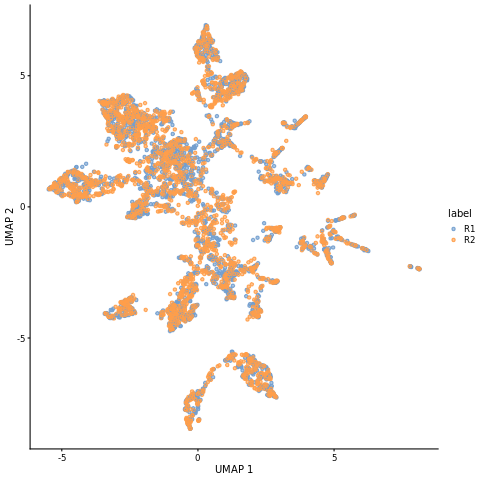

In [15]:
%%R
sce_vsg <- runUMAP(sce_vsg)
colLabels(sce_vsg) <- experiment_label
plotReducedDim(sce_vsg, dimred="UMAP", colour_by="label"
              ) + geom_point(
    shape=21, alpha = 1, size = 1, aes(color = factor(experiment_label)))

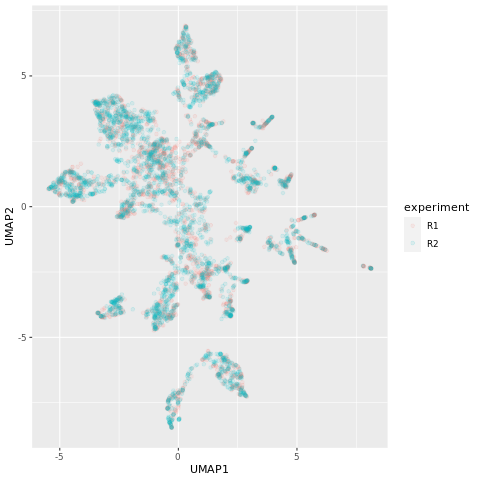

In [16]:
%%R
umap <- reducedDim(sce_vsg, "UMAP")
umap_df <- as.data.frame(umap)
colnames(umap_df) <- c("UMAP1", "UMAP2")
umap_df$experiment=experiment_label
head(umap_df)
ggplot(umap_df, aes(x = UMAP1, y = UMAP2, 
                     color=experiment))+ geom_point(
   
alpha = 1/10, 
)

In [17]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 437  183   47  192  233 1057  152  108 1207  719  395  321  270  154   29   43 
  17   18 
  43   38 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


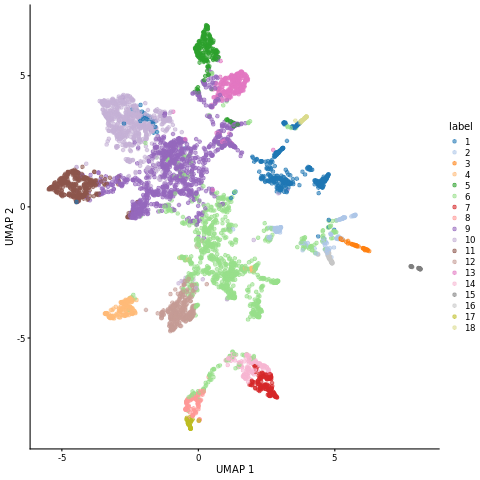

In [18]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

R[write to console]: 
Attaching package: 'celda'


R[write to console]: The following objects are masked from 'package:scater':

    normalizeCounts, plotHeatmap


R[write to console]: The following object is masked from 'package:scuttle':

    normalizeCounts


R[write to console]: The following object is masked from 'package:S4Vectors':

    params




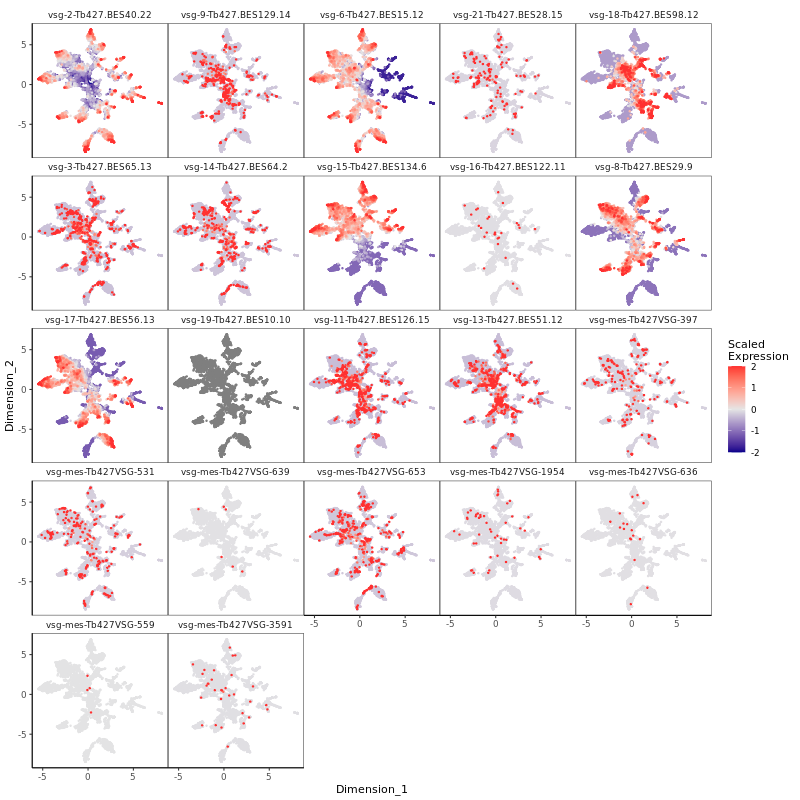

In [19]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

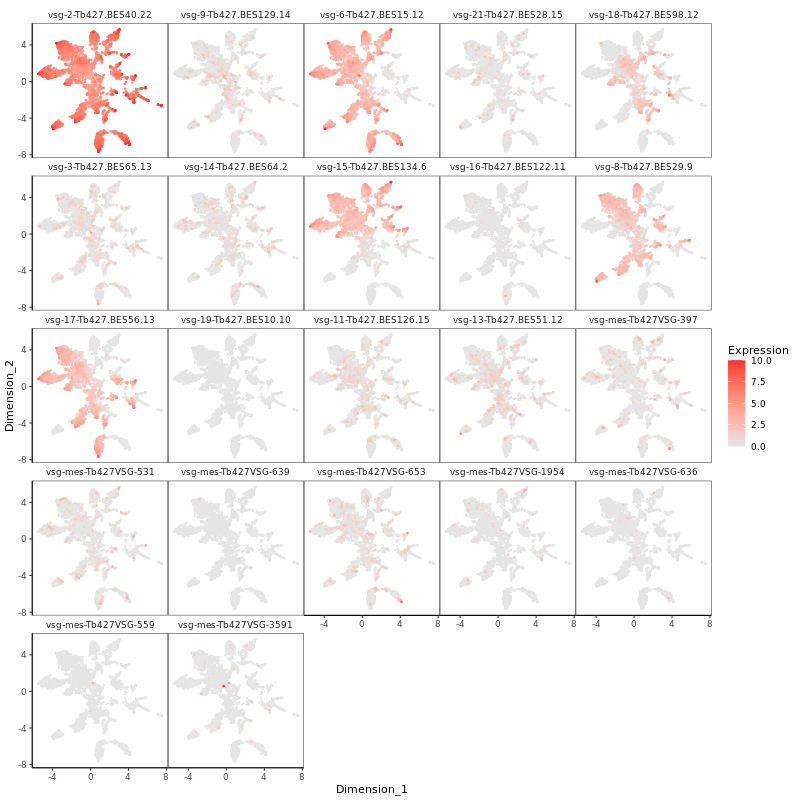

In [20]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [21]:
%%R
max(logcounts(sce_vsg))

[1] 17.94252


In [22]:
%%R
head(colLabels(sce_vsg))

[1] 9  9  9  11 6  14
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18


In [23]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [24]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [25]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 9  9  9  11 6  14
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18


In [26]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex2_merge_norm.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex2_merge_norm.csv')
umap.head()



,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,4.890897,0.501308,0.501308,0.0,0.000000,0.000000,0.501308,1.621751,0.0,0.501308,...,0.0,0.0,0.501308,0.0,0.0,0.0,0.0,2.966866,0.351578,9
AAACCCAAGTTGTAAG-1,4.244850,0.000000,2.227742,0.0,0.941858,0.546463,0.000000,1.506907,0.0,1.251871,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.008947,1.237160,9
AAACCCACACCTTCCA-1,5.227524,0.000000,2.305185,0.0,0.000000,0.000000,0.989558,2.305185,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.937380,3.922138,9
AAACCCACAGTTTCAG-1,8.219591,0.000000,4.710222,0.0,0.000000,0.000000,0.000000,2.593444,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-5.227809,0.727796,11
AAACCCACATGAATAG-1,5.732810,0.000000,2.419088,0.0,2.419088,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.310496,-3.279765,6


In [27]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']

In [28]:
%R -o lab
umap = pd.concat([pd.read_csv("new_count_vsg_vex2_merge.csv").T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv("new_count_vsg_vex2_merge.csv")
umap.head()




,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,1,0,0,0,0,2.966866,0.351578,9
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,-1.008947,1.237160,9
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,1.937380,3.922138,9
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-5.227809,0.727796,11
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1.310496,-3.279765,6


In [29]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

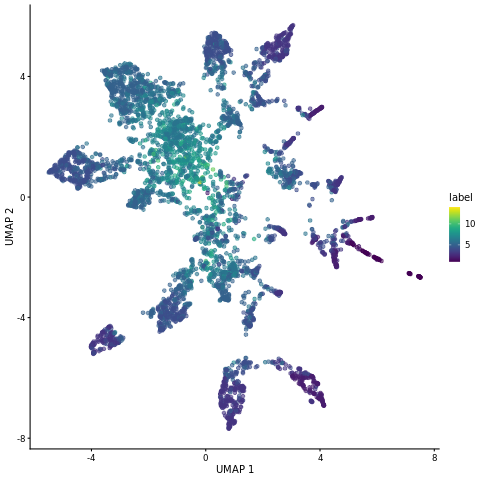

In [30]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [31]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,1,0,0,0,0,2.966866,0.351578,9
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,-1.008947,1.237160,9
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,1.937380,3.922138,9
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-5.227809,0.727796,11
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1.310496,-3.279765,6


In [32]:
umap.sum().drop(['comp1','comp2','clusters']).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           6
vsg-mes-Tb427VSG-559          11
vsg-16-Tb427.BES122.11        36
vsg-mes-Tb427VSG-636          39
vsg-mes-Tb427VSG-1954         78
vsg-mes-Tb427VSG-3591        169
vsg-21-Tb427.BES28.15        196
vsg-mes-Tb427VSG-531         267
vsg-mes-Tb427VSG-397         287
vsg-14-Tb427.BES64.2         584
vsg-mes-Tb427VSG-653         638
vsg-3-Tb427.BES65.13         828
vsg-9-Tb427.BES129.14        878
vsg-11-Tb427.BES126.15       960
vsg-13-Tb427.BES51.12       1123
vsg-18-Tb427.BES98.12       4025
vsg-8-Tb427.BES29.9         8220
vsg-17-Tb427.BES56.13      13927
vsg-15-Tb427.BES134.6      14112
vsg-6-Tb427.BES15.12       29281
vsg-2-Tb427.BES40.22      302771
dtype: object

#umap.sum().drop(['comp1','comp2','clusters']).sort_values()
vsg-mes-Tb427VSG-1954        193
vsg-21-Tb427.BES28.15        313
vsg-mes-Tb427VSG-531         529
vsg-mes-Tb427VSG-397         547
vsg-14-Tb427.BES64.2        1133
vsg-mes-Tb427VSG-653        1204
vsg-9-Tb427.BES129.14       1220
vsg-3-Tb427.BES65.13        1327
vsg-11-Tb427.BES126.15      1427
vsg-13-Tb427.BES51.12       1598
vsg-18-Tb427.BES98.12       5833
vsg-8-Tb427.BES29.9        13227
vsg-17-Tb427.BES56.13      21209
vsg-15-Tb427.BES134.6      22677
vsg-6-Tb427.BES15.12       44708
vsg-2-Tb427.BES40.22      463461

In [33]:
select = umap.drop(['comp1','comp2','clusters'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0,1,0,0,0,0
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,0,0,0
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [34]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,1,0,0,0,0,2.966866,0.351578,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,-1.008947,1.237160,9,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,1.937380,3.922138,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,-5.227809,0.727796,11,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,1.310496,-3.279765,6,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [35]:
umap.vsg_class.value_counts().head(10)

(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                           386
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                285
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-18-Tb427.BES98.12, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)    239
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                       220
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                  194
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                                                  170
(vsg-15-Tb427.BES134.6, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                       159
(vsg-2

In [36]:
umap.size_class.value_counts()

5     1375
4     1276
6     1013
3      845
7      517
2      281
8      167
1       70
9       61
10      18
11       4
14       1
Name: size_class, dtype: int64

In [37]:
umap.shape

(5628, 27)

In [38]:
%R -o experiment_label

In [39]:
umap['replica']=experiment_label
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,2.966866,0.351578,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8,R1
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,-1.008947,1.237160,9,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7,R1
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,1.937380,3.922138,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4,R1
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,-5.227809,0.727796,11,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4,R1
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,1.310496,-3.279765,6,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5,R1


In [40]:
umap.to_csv("new_count_vsg_vex2_merge.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,2.966866,0.351578,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8,R1
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,-1.008947,1.237160,9,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7,R1
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,1.937380,3.922138,9,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4,R1
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,-5.227809,0.727796,11,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4,R1
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,1.310496,-3.279765,6,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5,R1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex2_merge.csv',index_col =[0])

In [8]:
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,2.966866,0.351578,9,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8,R1
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,-1.008947,1.237160,9,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7,R1
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,1.937380,3.922138,9,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4,R1
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,-5.227809,0.727796,11,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4,R1
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,1.310496,-3.279765,6,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5,R1


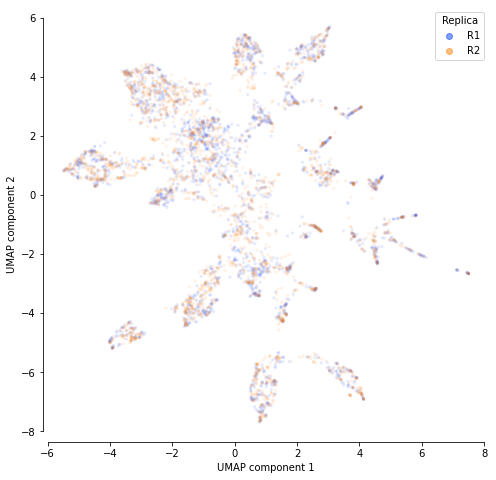

In [9]:

fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='replica', ax=ax,
                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
leg.set_title('Replica')

ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

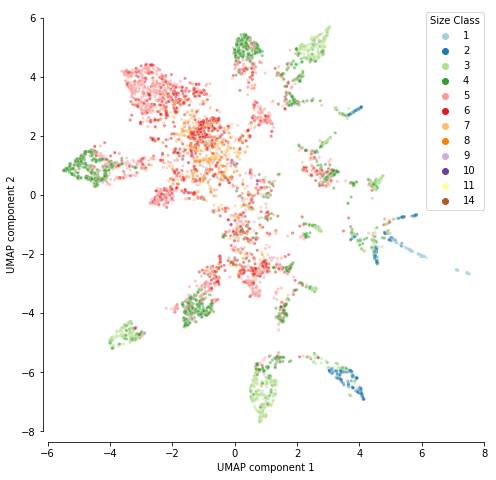

In [10]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
sns.despine(fig,trim=True)

In [11]:
def clean_vsgs(X):
    res = []
    for n in eval(X):

        if 'mes' in n:
            temp_id = 'mes-'+n.split('-')[-1]
        else:
            temp_id = 'vsg-'+n.split('-')[1]
        res.append(temp_id)
    return ';'.join(res)

In [12]:
df['vsg_class2'] = df['vsg_class'].apply(clean_vsgs)

In [13]:
vsg_selections = df['vsg_class2'].value_counts().head(9).index.values


In [14]:
df['vsg_class3'] = [n if n in vsg_selections else 'other' for n in df['vsg_class2']]
df.head()
                    

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,vsg_class,size_class,replica,vsg_class2,vsg_class3
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,2.966866,0.351578,9,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8,R1,vsg-14;vsg-15;vsg-17;vsg-2;vsg-6;vsg-8;vsg-9;m...,other
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,-1.008947,1.237160,9,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7,R1,vsg-15;vsg-17;vsg-18;vsg-2;vsg-3;vsg-6;vsg-8,other
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,1.937380,3.922138,9,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4,R1,vsg-14;vsg-15;vsg-2;vsg-6,other
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,-5.227809,0.727796,11,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4,R1,vsg-15;vsg-17;vsg-2;vsg-6,vsg-15;vsg-17;vsg-2;vsg-6
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,1.310496,-3.279765,6,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5,R1,vsg-13;vsg-17;vsg-18;vsg-2;vsg-6,other


In [15]:
#import seaborn as sns
#fig,ax=plt.subplots(figsize=(8,8))
#sns.scatterplot(data=df, x='comp1',y='comp2', hue='vsg_class3', ax=ax,
#                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
#ax.set_xlabel('UMAP component 1')   
#ax.set_ylabel('UMAP component 2')

#sns.despine(fig,trim=True)

In [16]:
dict_size = df['vsg_class3'].value_counts().to_dict()
df['vsg_class4'] = [n+' (n='+str(dict_size[n])+')' for n in df['vsg_class3']]
df['vsg_count_5'] = [dict_size[n] for n in df['vsg_class3']]


In [39]:
palette = sns.color_palette('bright')
use_palette = list(palette)
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [40]:
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [41]:
light_blue = use_palette[-1]#= (0.5, 0.5, 0.5)
grey = use_palette[-3]
use_palette[-3]=light_blue
use_palette[-1]=grey
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.0, 0.8431372549019608, 1.0),
 (1.0, 0.7686274509803922, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098)]

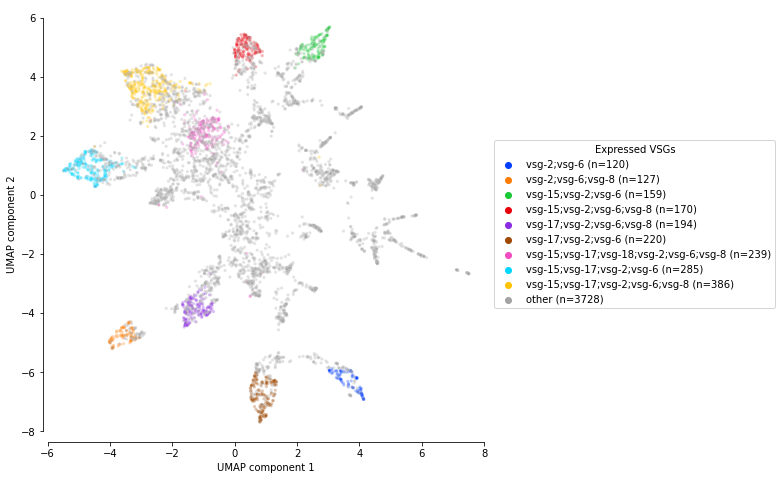

In [42]:

import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df.sort_values('vsg_count_5'), x='comp1',y='comp2', hue='vsg_class4', ax=ax,
                alpha=0.3, s=10, palette =use_palette)

#sns.scatterplot(data=df[df['vsg_class3']=='other'].sort_values('vsg_count_5'), x='comp1',y='comp2',  ax=ax,
#                alpha=0.1, s=10, c='b')


#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

In [28]:
df.sort_values('vsg_count_5')['vsg_count_5'].unique()


array([ 120,  127,  159,  170,  194,  220,  239,  285,  386, 3728])

In [49]:
#df[df['vsg_count_5']<316]

In [50]:
#df['vsg_count_5'].value_counts()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]